                                                                       PERSONAL FINANCE TRACKER & DATA VISUALIZTAION SOFTWARE
1. Login
2. Create Account
3. Continue as Guest
4. Login as Admin
5. Exit
                                                                                    𝗣𝗲𝗿𝘀𝗼𝗻𝗮𝗹 𝗙𝗶𝗻𝗮𝗻𝗰𝗲 𝗧𝗿𝗮𝗰𝗸𝗲𝗿
Login Successful.
User ID =  1
                                                                                                    MENU
1. Add Data
2. View Data
3. Visualise Data
4. Save & Logout
TOTAL= INR 24538.0
Max till now=  24739.5


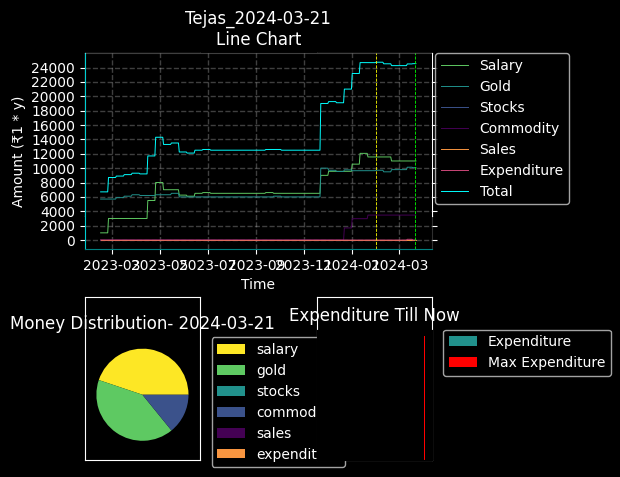

                                                                                                    MENU
1. Add Data
2. View Data
3. Visualise Data
4. Save & Logout
Data saved successfully. ✓
                                                                       PERSONAL FINANCE TRACKER & DATA VISUALIZTAION SOFTWARE
1. Login
2. Create Account
3. Continue as Guest
4. Login as Admin
5. Exit
                                                                                    𝗣𝗲𝗿𝘀𝗼𝗻𝗮𝗹 𝗙𝗶𝗻𝗮𝗻𝗰𝗲 𝗧𝗿𝗮𝗰𝗸𝗲𝗿
Login Successful.
User ID =  52455
                                                                                                    MENU
1. Add Data
2. View Data
3. Visualise Data
4. Save & Logout
TOTAL= INR 30200.0
Max till now=  34700.0


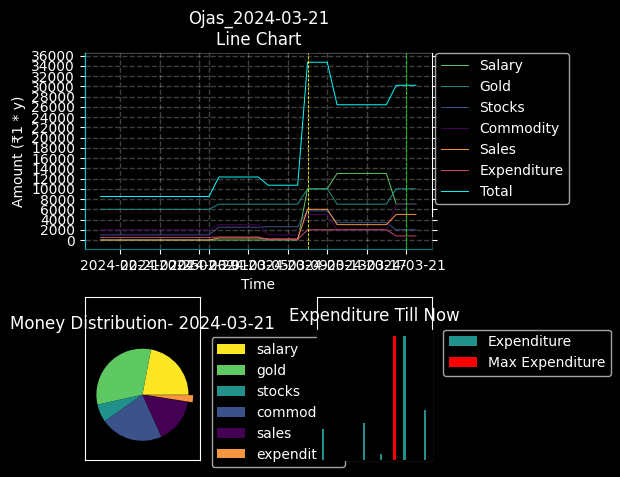

                                                                                                    MENU
1. Add Data
2. View Data
3. Visualise Data
4. Save & Logout
Data saved successfully. ✓
                                                                       PERSONAL FINANCE TRACKER & DATA VISUALIZTAION SOFTWARE
1. Login
2. Create Account
3. Continue as Guest
4. Login as Admin
5. Exit
                                                                                    𝗣𝗲𝗿𝘀𝗼𝗻𝗮𝗹 𝗙𝗶𝗻𝗮𝗻𝗰𝗲 𝗧𝗿𝗮𝗰𝗸𝗲𝗿
Login Successful.
User ID =  1
                                                                                                    MENU
1. Add Data
2. View Data
3. Visualise Data
4. Save & Logout
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|             u_id |           salary |             gold |           stocks |        commodity |            sales |      expenditu

ValueError: invalid literal for int() with base 10: ''

In [1]:
import mysql.connector as my                                    #required modules
import matplotlib.pyplot as plt 
import numpy as np
import time
import datetime
from datetime import date
import getpass
import functions                          #user-defined modules
import plot

z=0                 #failed login attempts
colors=["#fde725","#5ec962","#21918c","#3b528b","#440154","#f89540","#cc4778","cyan","#7e03a8","tomato","tan","#0d0887","green","blue","indigo","violet"]
#===============================================================================================================connecting mySQL
mycon=my.connect(host='localhost',user='root',passwd='tejas123',database='finance')
cursor=mycon.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS user (u_id INT PRIMARY KEY, u_name VARCHAR(255), pwd VARCHAR(255))")
cursor.execute("CREATE TABLE IF NOT EXISTS money (u_id INT PRIMARY KEY, salary FLOAT DEFAULT 0, gold FLOAT DEFAULT 0, stocks FLOAT DEFAULT 0, commodity FLOAT DEFAULT 0, sales FLOAT DEFAULT 0, expenditure FLOAT DEFAULT 0, total DOUBLE AS (salary + gold + stocks + commodity + sales - expenditure), entryDate date);")

#=======================================================================================================================
#function defined in user-defined module "functions.py"
# add_data()
# view_data()
# fetch_data()
# plot_data()
#==================================================================================================================user operations
def main_menu(u_id):
    ch=1
    while ch!=0:
        print(201*"=","\n",100*" ","MENU\n",201*"=","\n","1. Add Data\n2. View Data\n3. Visualise Data\n4. Save & Logout",sep="")
        ch=int(input("Enter your choice: "))
        if ch==1:
            functions.add_data(u_id)
        elif ch==2:
            functions.view_data(u_id)
        elif ch==3:
            requireds=plot.fetch_data(u_id)                             #in progress
            if requireds==None:
                print("Not enough data to visualize.")
            else:
                plot.plot_data(requireds,u_name)
        elif ch==4:
            print("Data saved successfully. ✓")
            break
        else:
            print("Invalid Choice. ✖")
#=================================================================================================================guest operations
def guest_plot():
    plt.style.use('dark_background')
    print(201*"=")
    print("\tMENU\n1. Bar Graph\n2. Histogram\n3. Scatter Plot\n4. Line Chart\n5. Pie Chart\n6. 3d Scatter\n7. 3d Surface\n8. All")
    c=int(input("Enter your choice: "))
    x = []
    y = []
    d_attr=[]
    count=0
    if c in [1,2,3,4]:
        heading=input("Title: ")
        x_label=input("Name of independent attribute (x-axis): ")
        start=int(input("{} start value: ".format(x_label)))
        end=int(input("{} end value: ".format(x_label)))
        width=int(input("{} class width: ".format(x_label)))
        for i in range(start,end+1,width):
            x.append(i)
            count+=1
        resume=False
        while resume==False:
            dependent=int(input("No. of dependent attributes: "))
            if dependent>16:
                print("Too many variables! The maximum limit is 16\nNOTE: Enter 0 to exit.")
            elif dependent==0:
                break
            else:
                resume=True
        if dependent==0:
            pass
        else:
            for i in range(dependent):
                d_attr.append(input("Dependent Attribute {}: ".format(i+1)))
            y.append(d_attr)

            for i in range(dependent):
                print("Enter {} observations of {}: ".format(count,d_attr[i]))
                values=[]
                for j in range(count):
                    value=float(input("{}{}: ".format(d_attr[i],j+1)))
                    values.append(value)
                y.append(values)
            fig, ax=plt.subplots()
            width=1
            for i in range(dependent):
                if c==1:
                    plt.bar(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7,width=width)
                elif c==2:
                    plt.hist(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7,width=width)
                elif c==3:
                    plt.scatter(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7)
                else:
                    plt.plot(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7)
                width-=0.2
            plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
            plt.title(heading)
            plt.xticks(rotation=30)
            plt.xlabel(x_label)
            ax.spines['bottom'].set_color('teal')
            ax.spines['top'].set_color('#ffffff40') 
            ax.spines['right'].set_color('#ffffff40')
            ax.spines['left'].set_color('darkturquoise')
            ax.grid(linestyle = "dashed",linewidth = 1, alpha = 0.25)
            #plt.savefig("example.png", dpi=1000)
            plt.show()
    elif c==5:
        heading=input("Title: ")
        label=[]
        y=[]
        resume=False
        while resume==False:
            n=int(input("How many variables? "))
            if n>16:
                print("Too many variables! The maximum limit is 16\nNOTE: Enter 0 to exit.")
            elif n==0:
                break
            else:
                resume=True
        if n==0:
            pass
        else:
            for i in range(n):
                label.append(input("Name of variable {}: ".format(i+1)))
            for i in range(n):
                y.append(float(input("Amount of {}: ".format(label[i]))))
            plt.pie(y, labels = label, colors=colors[:n])
            plt.legend(title = heading)
            plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
            plt.show() 

    elif c==8:
        heading=input("Title: ")
        x_label=input("Name of independent attribute (x-axis): ")
        start=int(input("{} start value: ".format(x_label)))
        end=int(input("{} end value: ".format(x_label)))
        width=int(input("{} class width: ".format(x_label)))
        for i in range(start,end+1,width):
            x.append(i)
            count+=1
        resume=False
        while resume==False:
            dependent=int(input("No. of dependent attributes: "))
            if dependent>16:
                print("Too many variables! The maximum limit is 16\nNOTE: Enter 0 to exit.")
            elif dependent==0:
                break
            else:
                resume=True
        if dependent==0:
            pass
        else:
            for i in range(dependent):
                d_attr.append(input("Dependent Attribute {}: ".format(i+1)))
            y.append(d_attr)

            for i in range(dependent):
                print("Enter {} observations of {}: ".format(count,d_attr[i]))
                values=[]
                for j in range(count):
                    value=float(input("{}{}: ".format(d_attr[i],j+1)))
                    values.append(value)
                y.append(values)
            width=1
            fig, ax=plt.subplots(2,2)
            for i in range(dependent):
                ax[0, 0].bar(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7,width=width)
                ax[0, 0].set_title("Bar Graph") 
                ax[0, 0].legend(loc="upper left")
                ax[0, 0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
                ax[0, 1].hist(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7,width=width)
                ax[0, 1].set_title("Histogram") 
                ax[0, 1].legend(loc="upper left")
                ax[0, 1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
                ax[1, 0].scatter(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7)
                ax[1, 0].set_title("Scatter Plot") 
                ax[1, 0].legend(loc="upper left")
                ax[1, 0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
                ax[1, 1].plot(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7)
                ax[1, 1].set_title("Line Chart")
                ax[1, 1].legend(loc="upper left")
                ax[1, 1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
                width-=0.05
            plt.title(heading)
            plt.xticks(rotation=30)
            plt.xlabel(x_label)
            #plt.savefig("example.png", dpi=1000)
            plt.show() 
    else:
        print("Invalid Choice! ✖")
        print(201*"=")
            
#=========================================================================================================Start of execution flow
#==================================================================================================================================
while True: 
    print(201*"=")
    greet="PERSONAL FINANCE TRACKER & DATA VISUALIZTAION SOFTWARE"
    print(70*" ",greet)
    print(201*"=","\n","1. Login\n2. Create Account\n3. Continue as Guest\n4. Login as Admin\n5. Exit",sep="")                #Login Menu
    user_type=int(input("Enter your choice: "))

#==========================================================================================================Login
    if user_type==1:
        print(83*" ","𝗣𝗲𝗿𝘀𝗼𝗻𝗮𝗹 𝗙𝗶𝗻𝗮𝗻𝗰𝗲 𝗧𝗿𝗮𝗰𝗸𝗲𝗿")
        u_name=input("Username: ")
        q="select u_name from user "
        cursor.execute(q)
        data=cursor.fetchall()
        names=[]
        for i in data:
            names.append(i[0])
        if u_name not in names:
            print("No account exists with that username.")
        else:
            try:
                pwd = getpass.getpass()
            except Exception as error:
                print('There was some error: ', error)
            else:
                q="select pwd from user where u_name='{}'".format(u_name)
                cursor.execute(q)
                data=cursor.fetchall()
                if data[0][0]==pwd:
                    print("Login Successful.")           
                    q="select u_id from user where u_name='{}'".format(u_name)
                    cursor.execute(q)
                    u_id=cursor.fetchall()[0][0]
                    print("User ID = ",u_id)
                    main_menu(u_id)
                else:
                    print("Incorrect password! ✖")
                    z+=1
                    if z>=2:
                        print("There have been more than 1 failed login attempts. Closing the system.")
                        time.sleep(0.3)
                        print(".",end="")
                        time.sleep(0.3)
                        print(".",end="")
                        time.sleep(0.3)
                        print(".",end="")
                        time.sleep(0.3)
                        break
                    print(201*"=")
#=========================================================================================================Create Account
    elif user_type==2:
        print(83*" ","𝗣𝗲𝗿𝘀𝗼𝗻𝗮𝗹 𝗙𝗶𝗻𝗮𝗻𝗰𝗲 𝗧𝗿𝗮𝗰𝗸𝗲𝗿")
        ok=False
        names=[]
        q="select u_name from user"
        cursor.execute(q)
        data=cursor.fetchall()
        for i in data:
            names.append(i[0])
        while ok!=True:                                                  #set up in mySQL before running
            u_name=input("\nUsername: ")
            if u_name=="exit" or u_name in names:
                if u_name=="exit":
                    break
                else:
                    ok=False
                    print("That username is not available. Try another one.\n[Enter 'exit' to cancel account creation.]")
            else:
                pwd=input("Password: ")
                u_id = datetime.datetime.now().strftime("%H%M%S")
                q="insert into user values({},'{}','{}')".format(u_id,u_name,pwd)
                cursor.execute(q)
                mycon.commit()
                print("Account Created Successfully! ✓")
                print("Your User ID is: ",u_id)
                break
#==========================================================================================================Guest
    elif user_type==3:
        print(81*" ","𝗗𝗮𝘁𝗮 𝗩𝗶𝘀𝘂𝗮𝗹𝗶𝘇𝗮𝘁𝗶𝗼𝗻 𝗦𝗼𝗳𝘁𝘄𝗮𝗿𝗲")
        a='y'
        while a=='y':
            guest_plot()
            a=input("Do you want to continue as guest? (y/n): ")
            if a=='n':
                break
        if a!='n':
            print("Invalid response! ✖\nRedirecting to main menu. . .")
#==========================================================================================================Admin mode
    elif user_type==4:
        try:
            p = getpass.getpass()
        except Exception as error:
            print('There was some error: ', error)
        else:
            if p=="infinity":
                print("Hello Sir,")
                print("Database changed.")
                q=""
                while(q not in ["exit;","exit"]):
                    q=input("")
                    if q.lower()=="exit":
                        print("Exited the database.")
                        break
                    cursor2=mycon.cursor()
                    cursor2.execute(q)
                    data=cursor2.fetchall()
                    if len(data)!=0:           
                        for i in range(0,len(data)):
                            print(data[i])
                    else:
                        print("Operation performed.")
                    mycon.commit()
            else:
                print("Incorrect Password >:(")
                z+=1
                if z>=2:
                    print("There have been more than 1 failed login attempts. Closing the system.")
                    time.sleep(0.3)
                    print(".",end="")
                    time.sleep(0.3)
                    print(".",end="")
                    time.sleep(0.3)
                    print(".",end="")
                    time.sleep(0.3)
                    break
                print(201*"=")
#==========================================================================================================Exit
    elif user_type==5:
        print(201*"=")
        print("Made with <3 Tejas, Ojas & Nandana :)")
        time.sleep(1)
        print(".",end="")
        time.sleep(1)
        print(".",end="")
        time.sleep(1)
        print(".",end="\n")
        print(201*"=")
        break
    else:
        print("Invalid choice! ✖")


